<a href="https://colab.research.google.com/github/c-mcbride/DataAnalysisProject/blob/main/Final_ProjectMilestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates
from matplotlib.dates import date2num
import seaborn as sns

# Importing and Analyzing FRED Unemployment Data

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Data Analysis/UNRATE.csv")
print(df)

         DATE  UNRATE
0    1/1/1948     3.4
1    2/1/1948     3.8
2    3/1/1948     4.0
3    4/1/1948     3.9
4    5/1/1948     3.5
..        ...     ...
892  5/1/2022     3.6
893  6/1/2022     3.6
894  7/1/2022     3.5
895  8/1/2022     3.7
896  9/1/2022     3.5

[897 rows x 2 columns]


Checking the types of the variables

In [ ]:
df.dtypes

DATE       object
UNRATE    float64
dtype: object

Changing the dates to date objects

In [ ]:
df['Date'] = pd.to_datetime(df['DATE'])
del df['DATE']
df.dtypes

UNRATE           float64
Date      datetime64[ns]
dtype: object

Changing the index of the data frame to include newly created date time objects

In [ ]:
indexList = list(df['Date'])
del df['Date']
df.index = indexList
print(df)

            UNRATE
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
...            ...
2022-05-01     3.6
2022-06-01     3.6
2022-07-01     3.5
2022-08-01     3.7
2022-09-01     3.5

[897 rows x 1 columns]


Create Time Series Graph from Data

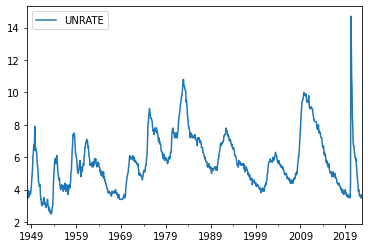

In [ ]:
graphTest = df
graphTest.plot()

Subsetting df for specific recessions

In [ ]:
recession1953 =  df['1953-07-01':'1954-05-01']
averageUnemployment1953 = recession1953['UNRATE'].mean()
print(averageUnemployment1953)

4.263636363636364


Recession of 1960 Subset

In [ ]:
recession1960 = df["1960-04-01" : '1961-02-01']
averageUnemployment1960 = recession1960['UNRATE'].mean()
print(averageUnemployment1960)

5.872727272727274


Recession of 1981

In [ ]:
recession1981 = df["1981-07-01" : '1982-11-01']
averageUnemployment1981 = recession1981['UNRATE'].mean()
print(averageUnemployment1981)

8.976470588235296


Early 1990s Recession

In [ ]:
recession1990 = df["1990-07-01": "1991-03-01"]
averageUnemployment1990 = recession1990['UNRATE'].mean()
print(averageUnemployment1990)

6.144444444444444


Great Recession

In [ ]:
recession2007 = df["2007-12-01":"2009-10-01"]
averageUnempoyment2007 = recession2007['UNRATE'].mean()
print(averageUnempoyment2007)

7.22608695652174


In [ ]:
print(recession2007)

            UNRATE
2007-12-01     5.0
2008-01-01     5.0
2008-02-01     4.9
2008-03-01     5.1
2008-04-01     5.0
2008-05-01     5.4
2008-06-01     5.6
2008-07-01     5.8
2008-08-01     6.1
2008-09-01     6.1
2008-10-01     6.5
2008-11-01     6.8
2008-12-01     7.3
2009-01-01     7.8
2009-02-01     8.3
2009-03-01     8.7
2009-04-01     9.0
2009-05-01     9.4
2009-06-01     9.5
2009-07-01     9.5
2009-08-01     9.6
2009-09-01     9.8
2009-10-01    10.0


Current Unemployment Data

In [ ]:
currentUnemployment = df['2022-01-01' : '2022-09-01']
averageUnemployment2022 = currentUnemployment['UNRATE'].mean()
print(averageUnemployment2022)

3.6555555555555554


Creating a list from recession data

In [ ]:
averageUnemploymentList = [averageUnemployment2022, averageUnempoyment2007,averageUnemployment1990,averageUnemployment1981, averageUnemployment1960, averageUnemployment1953 ]
averageUnemploymentList.reverse()
print(averageUnemploymentList)

[4.263636363636364, 5.872727272727274, 8.976470588235296, 6.144444444444444, 7.22608695652174, 3.6555555555555554]


Creating an average unemployment data frame from past recessions

In [ ]:
rowNames = ["Current 2022", "Great Recession 2007" ,  'Recession 1990', 'Recession 1981', 'Recession 1960','Recession 1953' ]
rowNames.reverse()
recession_df = pd.DataFrame(averageUnemploymentList)
recession_df.index = rowNames
recession_df.columns = ['Mean Unemployment']

print(recession_df)

                      Mean Unemployment
Recession 1953                 4.263636
Recession 1960                 5.872727
Recession 1981                 8.976471
Recession 1990                 6.144444
Great Recession 2007           7.226087
Current 2022                   3.655556


Creating Bar Graph of Unemployment

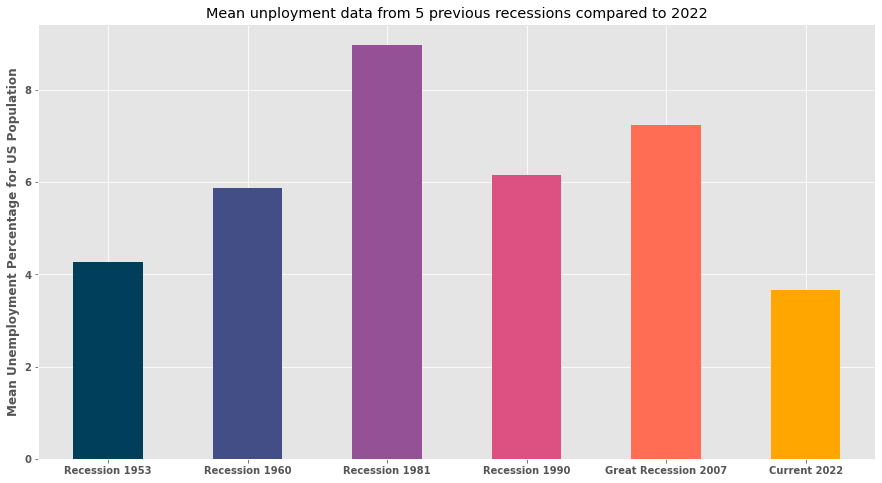

In [ ]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,8)
recession_df.plot.bar(use_index = True, y = "Mean Unemployment", color = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"], legend = False, 
                  title = 'Mean unployment data from 5 previous recessions compared to 2022' )

plt.xticks(rotation = 0, fontsize = 10, fontweight = 'bold')
plt.ylabel('Mean Unemployment Percentage for US Population', fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

# Analyzing Gross Domestic Product 

In [ ]:
gdpDf= pd.read_csv(r"/content/drive/MyDrive/Data Analysis/GDP.csv")
print(gdpDf)

          DATE        GDP
0     1/1/1947    243.164
1     4/1/1947    245.968
2     7/1/1947    249.585
3    10/1/1947    259.745
4     1/1/1948    265.742
..         ...        ...
297   4/1/2021  23046.934
298   7/1/2021  23550.420
299  10/1/2021  24349.121
300   1/1/2022  24740.480
301   4/1/2022  25248.476

[302 rows x 2 columns]


Changing DATE to date objects

In [ ]:
gdpDf['Date'] = pd.to_datetime(gdpDf['DATE'])
#del gdpDf['DATE']
print(gdpDf)


          DATE        GDP       Date
0     1/1/1947    243.164 1947-01-01
1     4/1/1947    245.968 1947-04-01
2     7/1/1947    249.585 1947-07-01
3    10/1/1947    259.745 1947-10-01
4     1/1/1948    265.742 1948-01-01
..         ...        ...        ...
297   4/1/2021  23046.934 2021-04-01
298   7/1/2021  23550.420 2021-07-01
299  10/1/2021  24349.121 2021-10-01
300   1/1/2022  24740.480 2022-01-01
301   4/1/2022  25248.476 2022-04-01

[302 rows x 3 columns]


Create List to Hold Time Interval Labels

In [ ]:
interval = [0, 92, 184, 274, 365, 457]

Changing the index of the data frame to include newly created date objects

In [ ]:
indexList2 = list(gdpDf['Date'])
gdpDf.index = indexList2

Subsetting for Specific Recessions

In [ ]:
qRecession1953 = gdpDf['1953-07-01' : '1954-10-01']
qRecession1953['Elapsed Time'] = interval
print(qRecession1953)


                 DATE      GDP       Date  Elapsed Time
1953-07-01   7/1/1953  391.171 1953-07-01             0
1953-10-01  10/1/1953  385.970 1953-10-01            92
1954-01-01   1/1/1954  385.345 1954-01-01           184
1954-04-01   4/1/1954  386.121 1954-04-01           274
1954-07-01   7/1/1954  390.996 1954-07-01           365
1954-10-01  10/1/1954  399.734 1954-10-01           457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating Periods based on distance from start of recession

In [ ]:
dates = qRecession1953['Date']
dates.to_period('D')
dates = dates - dates[0]
print(dates)
#print(qRecession1953)

1953-07-01     0 days
1953-10-01    92 days
1954-01-01   184 days
1954-04-01   274 days
1954-07-01   365 days
1954-10-01   457 days
Name: Date, dtype: timedelta64[ns]


Placing period data into dataframe

In [ ]:
qRecession1953.loc[:,"Elapsed"] = dates
print(qRecession1953)

                 DATE      GDP       Date  Elapsed Time  Elapsed
1953-07-01   7/1/1953  391.171 1953-07-01             0   0 days
1953-10-01  10/1/1953  385.970 1953-10-01            92  92 days
1954-01-01   1/1/1954  385.345 1954-01-01           184 184 days
1954-04-01   4/1/1954  386.121 1954-04-01           274 274 days
1954-07-01   7/1/1954  390.996 1954-07-01           365 365 days
1954-10-01  10/1/1954  399.734 1954-10-01           457 457 days


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Checking Data type of elapsed days column

In [ ]:
qRecession1953['Elapsed'].dtypes

dtype('<m8[ns]')

Setting the newly created periods as index 

In [ ]:
qRecession1953.index = qRecession1953['Elapsed']
print(qRecession1953)

               DATE      GDP       Date  Elapsed Time  Elapsed
Elapsed                                                       
0 days     7/1/1953  391.171 1953-07-01             0   0 days
92 days   10/1/1953  385.970 1953-10-01            92  92 days
184 days   1/1/1954  385.345 1954-01-01           184 184 days
274 days   4/1/1954  386.121 1954-04-01           274 274 days
365 days   7/1/1954  390.996 1954-07-01           365 365 days
457 days  10/1/1954  399.734 1954-10-01           457 457 days


Adding a Recession Column to Describe the specific recession

In [ ]:
qRecession1953.loc[:,"Recession"] = "Recession 1953"
print(qRecession1953)

               DATE      GDP       Date  Elapsed Time  Elapsed       Recession
Elapsed                                                                       
0 days     7/1/1953  391.171 1953-07-01             0   0 days  Recession 1953
92 days   10/1/1953  385.970 1953-10-01            92  92 days  Recession 1953
184 days   1/1/1954  385.345 1954-01-01           184 184 days  Recession 1953
274 days   4/1/1954  386.121 1954-04-01           274 274 days  Recession 1953
365 days   7/1/1954  390.996 1954-07-01           365 365 days  Recession 1953
457 days  10/1/1954  399.734 1954-10-01           457 457 days  Recession 1953


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Creating a percent change from baseline

In [ ]:
start = 391.171

qRecession1953['start'] = start
qRecession1953['Change from baseline'] = 100 * (qRecession1953.GDP/qRecession1953.start-1)
print(qRecession1953)

               DATE      GDP       Date  Elapsed Time  Elapsed  \
Elapsed                                                          
0 days     7/1/1953  391.171 1953-07-01             0   0 days   
92 days   10/1/1953  385.970 1953-10-01            92  92 days   
184 days   1/1/1954  385.345 1954-01-01           184 184 days   
274 days   4/1/1954  386.121 1954-04-01           274 274 days   
365 days   7/1/1954  390.996 1954-07-01           365 365 days   
457 days  10/1/1954  399.734 1954-10-01           457 457 days   

               Recession    start  Change from baseline  
Elapsed                                                  
0 days    Recession 1953  391.171              0.000000  
92 days   Recession 1953  391.171             -1.329598  
184 days  Recession 1953  391.171             -1.489374  
274 days  Recession 1953  391.171             -1.290995  
365 days  Recession 1953  391.171             -0.044737  
457 days  Recession 1953  391.171              2.189068  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Subsetting Data Frame to contain the change from baseline indexed by quarter

In [ ]:
Recession1953 = qRecession1953['Change from baseline']
Recession1953['Elapsed Time'] = interval
print(Recession1953)

Elapsed
0 days 00:00:00                              0.0
92 days 00:00:00                       -1.329598
184 days 00:00:00                      -1.489374
274 days 00:00:00                      -1.290995
365 days 00:00:00                      -0.044737
457 days 00:00:00                       2.189068
Elapsed Time         [0, 92, 184, 274, 365, 457]
Name: Change from baseline, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


Subsetting for 1960 Recession

In [ ]:
qRecession1960 = gdpDf['1960-04-01' : '1961-07-01']
qRecession1960['Elapsed Time'] = interval
print(qRecession1960)

                 DATE      GDP       Date  Elapsed Time
1960-04-01   4/1/1960  541.080 1960-04-01             0
1960-07-01   7/1/1960  545.604 1960-07-01            92
1960-10-01  10/1/1960  540.197 1960-10-01           184
1961-01-01   1/1/1961  545.018 1961-01-01           274
1961-04-01   4/1/1961  555.545 1961-04-01           365
1961-07-01   7/1/1961  567.664 1961-07-01           457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating Periods to Represent Elapsed Days Since the start of the recession

In [ ]:
dates = qRecession1960['Date']
dates.to_period('D')
dates = dates - dates[0]
print(dates)

1960-04-01     0 days
1960-07-01    91 days
1960-10-01   183 days
1961-01-01   275 days
1961-04-01   365 days
1961-07-01   456 days
Name: Date, dtype: timedelta64[ns]


Placing elapsed Days into the Data Frame

In [ ]:
qRecession1960.loc[:,"Elapsed Days"] = dates
qRecession1960.index = qRecession1960['Elapsed Days']
print(qRecession1960)

                   DATE      GDP       Date  Elapsed Time Elapsed Days
Elapsed Days                                                          
0 days         4/1/1960  541.080 1960-04-01             0       0 days
91 days        7/1/1960  545.604 1960-07-01            92      91 days
183 days      10/1/1960  540.197 1960-10-01           184     183 days
275 days       1/1/1961  545.018 1961-01-01           274     275 days
365 days       4/1/1961  555.545 1961-04-01           365     365 days
456 days       7/1/1961  567.664 1961-07-01           457     456 days


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Organizing by Quarters

In [ ]:
qRecession1960.loc[:,"Recession"] = "Recession 1960"
print(qRecession1960)

                   DATE      GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                             
0 days         4/1/1960  541.080 1960-04-01             0       0 days   
91 days        7/1/1960  545.604 1960-07-01            92      91 days   
183 days      10/1/1960  540.197 1960-10-01           184     183 days   
275 days       1/1/1961  545.018 1961-01-01           274     275 days   
365 days       4/1/1961  555.545 1961-04-01           365     365 days   
456 days       7/1/1961  567.664 1961-07-01           457     456 days   

                   Recession  
Elapsed Days                  
0 days        Recession 1960  
91 days       Recession 1960  
183 days      Recession 1960  
275 days      Recession 1960  
365 days      Recession 1960  
456 days      Recession 1960  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Calculating Change From Baseline

In [ ]:
start = 541.080
qRecession1960['start'] = start
qRecession1960['Change from baseline'] = 100 * (qRecession1960.GDP/qRecession1960.start-1)
print(qRecession1960)

                   DATE      GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                             
0 days         4/1/1960  541.080 1960-04-01             0       0 days   
91 days        7/1/1960  545.604 1960-07-01            92      91 days   
183 days      10/1/1960  540.197 1960-10-01           184     183 days   
275 days       1/1/1961  545.018 1961-01-01           274     275 days   
365 days       4/1/1961  555.545 1961-04-01           365     365 days   
456 days       7/1/1961  567.664 1961-07-01           457     456 days   

                   Recession   start  Change from baseline  
Elapsed Days                                                
0 days        Recession 1960  541.08              0.000000  
91 days       Recession 1960  541.08              0.836106  
183 days      Recession 1960  541.08             -0.163192  
275 days      Recession 1960  541.08              0.727804  
365 days      Recession 1960  541.08     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Recession1960 = qRecession1960['Change from baseline']
Recession1960['Elapsed Time'] = interval
print(Recession1960)

Elapsed Days
0 days 00:00:00                              0.0
91 days 00:00:00                        0.836106
183 days 00:00:00                      -0.163192
275 days 00:00:00                       0.727804
365 days 00:00:00                       2.673357
456 days 00:00:00                       4.913137
Elapsed Time         [0, 92, 184, 274, 365, 457]
Name: Change from baseline, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


Subsetting for 1981 Recession

In [ ]:
qRecession1981 = gdpDf["1981-07-01" : "1982-10-01"]
qRecession1981['Elapsed Time'] = interval
print(qRecession1981)

                 DATE       GDP       Date  Elapsed Time
1981-07-01   7/1/1981  3260.609 1981-07-01             0
1981-10-01  10/1/1981  3280.818 1981-10-01            92
1982-01-01   1/1/1982  3274.302 1982-01-01           184
1982-04-01   4/1/1982  3331.972 1982-04-01           274
1982-07-01   7/1/1982  3366.322 1982-07-01           365
1982-10-01  10/1/1982  3402.561 1982-10-01           457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Create Periods based on data

In [ ]:
dates3 = qRecession1981['Date']
dates3.to_period('D')
dates3 = dates3 - dates3[0]
print(dates3)

1981-07-01     0 days
1981-10-01    92 days
1982-01-01   184 days
1982-04-01   274 days
1982-07-01   365 days
1982-10-01   457 days
Name: Date, dtype: timedelta64[ns]


Place Periods Into DataFrame

In [ ]:
qRecession1981.loc[:,"Elapsed Days"] = dates3
print(qRecession1981)

                 DATE       GDP       Date  Elapsed Time Elapsed Days
1981-07-01   7/1/1981  3260.609 1981-07-01             0       0 days
1981-10-01  10/1/1981  3280.818 1981-10-01            92      92 days
1982-01-01   1/1/1982  3274.302 1982-01-01           184     184 days
1982-04-01   4/1/1982  3331.972 1982-04-01           274     274 days
1982-07-01   7/1/1982  3366.322 1982-07-01           365     365 days
1982-10-01  10/1/1982  3402.561 1982-10-01           457     457 days


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Place Periods Into Index

In [ ]:
qRecession1981.index = qRecession1981['Elapsed Days']
print(qRecession1981)

                   DATE       GDP       Date  Elapsed Time Elapsed Days
Elapsed Days                                                           
0 days         7/1/1981  3260.609 1981-07-01             0       0 days
92 days       10/1/1981  3280.818 1981-10-01            92      92 days
184 days       1/1/1982  3274.302 1982-01-01           184     184 days
274 days       4/1/1982  3331.972 1982-04-01           274     274 days
365 days       7/1/1982  3366.322 1982-07-01           365     365 days
457 days      10/1/1982  3402.561 1982-10-01           457     457 days


Place the name of the recession into the dataframe

In [ ]:
qRecession1981.loc[:, "Recession"] = "Recession of 1981"
print(qRecession1981)

                   DATE       GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                              
0 days         7/1/1981  3260.609 1981-07-01             0       0 days   
92 days       10/1/1981  3280.818 1981-10-01            92      92 days   
184 days       1/1/1982  3274.302 1982-01-01           184     184 days   
274 days       4/1/1982  3331.972 1982-04-01           274     274 days   
365 days       7/1/1982  3366.322 1982-07-01           365     365 days   
457 days      10/1/1982  3402.561 1982-10-01           457     457 days   

                      Recession  
Elapsed Days                     
0 days        Recession of 1981  
92 days       Recession of 1981  
184 days      Recession of 1981  
274 days      Recession of 1981  
365 days      Recession of 1981  
457 days      Recession of 1981  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Calculating GDP Change From baseline

In [ ]:
start3 = 3260.609
qRecession1981['start'] = start3
qRecession1981['Change from baseline'] = 100 * (qRecession1981.GDP/qRecession1981.start - 1 )
print(qRecession1981)

                   DATE       GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                              
0 days         7/1/1981  3260.609 1981-07-01             0       0 days   
92 days       10/1/1981  3280.818 1981-10-01            92      92 days   
184 days       1/1/1982  3274.302 1982-01-01           184     184 days   
274 days       4/1/1982  3331.972 1982-04-01           274     274 days   
365 days       7/1/1982  3366.322 1982-07-01           365     365 days   
457 days      10/1/1982  3402.561 1982-10-01           457     457 days   

                      Recession     start  Change from baseline  
Elapsed Days                                                     
0 days        Recession of 1981  3260.609              0.000000  
92 days       Recession of 1981  3260.609              0.619792  
184 days      Recession of 1981  3260.609              0.419952  
274 days      Recession of 1981  3260.609              2.188640  
365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Create DataFrame to Hold Period and change from baseline

In [ ]:
Recession1981 = qRecession1981['Change from baseline']
Recession1981['Elapsed Time'] = interval
print(Recession1981)

Elapsed Days
0 days 00:00:00                              0.0
92 days 00:00:00                        0.619792
184 days 00:00:00                       0.419952
274 days 00:00:00                        2.18864
365 days 00:00:00                       3.242124
457 days 00:00:00                       4.353543
Elapsed Time         [0, 92, 184, 274, 365, 457]
Name: Change from baseline, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


Subsetting for Recession of 1990

In [ ]:
qRecession1990 = gdpDf["1990-07-01": "1991-10-01"]
qRecession1990['Elapsed Time'] = interval
print(qRecession1990)

                 DATE       GDP       Date  Elapsed Time
1990-07-01   7/1/1990  6015.116 1990-07-01             0
1990-10-01  10/1/1990  6004.733 1990-10-01            92
1991-01-01   1/1/1991  6035.178 1991-01-01           184
1991-04-01   4/1/1991  6126.862 1991-04-01           274
1991-07-01   7/1/1991  6205.937 1991-07-01           365
1991-10-01  10/1/1991  6264.540 1991-10-01           457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Create Periods 

In [ ]:
dates4 = qRecession1990['Date']
dates4.to_period('D')
dates4 = dates4 - dates4[0]
print(dates4)

1990-07-01     0 days
1990-10-01    92 days
1991-01-01   184 days
1991-04-01   274 days
1991-07-01   365 days
1991-10-01   457 days
Name: Date, dtype: timedelta64[ns]


Place Periods into dataframe

In [ ]:
qRecession1990.loc[:,"Elapsed Days"] = dates4
print(qRecession1990)

                 DATE       GDP       Date  Elapsed Time Elapsed Days
1990-07-01   7/1/1990  6015.116 1990-07-01             0       0 days
1990-10-01  10/1/1990  6004.733 1990-10-01            92      92 days
1991-01-01   1/1/1991  6035.178 1991-01-01           184     184 days
1991-04-01   4/1/1991  6126.862 1991-04-01           274     274 days
1991-07-01   7/1/1991  6205.937 1991-07-01           365     365 days
1991-10-01  10/1/1991  6264.540 1991-10-01           457     457 days


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Set Periods as Index

In [ ]:
qRecession1990.index = qRecession1990['Elapsed Days']
print(qRecession1990)

                   DATE       GDP       Date  Elapsed Time Elapsed Days
Elapsed Days                                                           
0 days         7/1/1990  6015.116 1990-07-01             0       0 days
92 days       10/1/1990  6004.733 1990-10-01            92      92 days
184 days       1/1/1991  6035.178 1991-01-01           184     184 days
274 days       4/1/1991  6126.862 1991-04-01           274     274 days
365 days       7/1/1991  6205.937 1991-07-01           365     365 days
457 days      10/1/1991  6264.540 1991-10-01           457     457 days


Naming the recession

In [ ]:
qRecession1990.loc[:,"Recession"] = "Recession of 1990"
print(qRecession1990)

                   DATE       GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                              
0 days         7/1/1990  6015.116 1990-07-01             0       0 days   
92 days       10/1/1990  6004.733 1990-10-01            92      92 days   
184 days       1/1/1991  6035.178 1991-01-01           184     184 days   
274 days       4/1/1991  6126.862 1991-04-01           274     274 days   
365 days       7/1/1991  6205.937 1991-07-01           365     365 days   
457 days      10/1/1991  6264.540 1991-10-01           457     457 days   

                      Recession  
Elapsed Days                     
0 days        Recession of 1990  
92 days       Recession of 1990  
184 days      Recession of 1990  
274 days      Recession of 1990  
365 days      Recession of 1990  
457 days      Recession of 1990  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Calculating GDP Change from Baseline

In [ ]:
start4 = 6015.116
qRecession1990['start'] = start4
qRecession1990['Change from baseline'] = 100 * (qRecession1990.GDP/qRecession1990.start-1)
print(qRecession1990)

                   DATE       GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                              
0 days         7/1/1990  6015.116 1990-07-01             0       0 days   
92 days       10/1/1990  6004.733 1990-10-01            92      92 days   
184 days       1/1/1991  6035.178 1991-01-01           184     184 days   
274 days       4/1/1991  6126.862 1991-04-01           274     274 days   
365 days       7/1/1991  6205.937 1991-07-01           365     365 days   
457 days      10/1/1991  6264.540 1991-10-01           457     457 days   

                      Recession     start  Change from baseline  
Elapsed Days                                                     
0 days        Recession of 1990  6015.116              0.000000  
92 days       Recession of 1990  6015.116             -0.172615  
184 days      Recession of 1990  6015.116              0.333526  
274 days      Recession of 1990  6015.116              1.857753  
365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Creating Dataframe to hold quarter index and change from baseline

In [ ]:
Recession1990 = qRecession1990['Change from baseline']
Recession1990['Elapsed Time'] = interval
print(Recession1990)

Elapsed Days
0 days 00:00:00                              0.0
92 days 00:00:00                       -0.172615
184 days 00:00:00                       0.333526
274 days 00:00:00                       1.857753
365 days 00:00:00                       3.172358
457 days 00:00:00                        4.14662
Elapsed Time         [0, 92, 184, 274, 365, 457]
Name: Change from baseline, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


Subsetting Data for Great Recession

In [ ]:
qRecession2007 = gdpDf["2007-12-01":"2009-04-01"]
qRecession2007['Elapsed Time'] = interval
print(qRecession2007)

                 DATE        GDP       Date  Elapsed Time
2008-01-01   1/1/2008  14706.538 2008-01-01             0
2008-04-01   4/1/2008  14865.701 2008-04-01            92
2008-07-01   7/1/2008  14898.999 2008-07-01           184
2008-10-01  10/1/2008  14608.208 2008-10-01           274
2009-01-01   1/1/2009  14430.901 2009-01-01           365
2009-04-01   4/1/2009  14381.236 2009-04-01           457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Create Periods Based on Data

In [ ]:
dates5 = qRecession2007['Date']
dates5.to_period("D")
dates5 = dates5 - dates5[0]
print(dates5)

2008-01-01     0 days
2008-04-01    91 days
2008-07-01   182 days
2008-10-01   274 days
2009-01-01   366 days
2009-04-01   456 days
Name: Date, dtype: timedelta64[ns]


Place Periods into Data Frame

In [ ]:
qRecession2007.loc[:,"Elapsed Days"] = dates5
print(qRecession2007)

                 DATE        GDP       Date  Elapsed Time Elapsed Days
2008-01-01   1/1/2008  14706.538 2008-01-01             0       0 days
2008-04-01   4/1/2008  14865.701 2008-04-01            92      91 days
2008-07-01   7/1/2008  14898.999 2008-07-01           184     182 days
2008-10-01  10/1/2008  14608.208 2008-10-01           274     274 days
2009-01-01   1/1/2009  14430.901 2009-01-01           365     366 days
2009-04-01   4/1/2009  14381.236 2009-04-01           457     456 days


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Set Periods as Index

In [ ]:
qRecession2007.index = qRecession2007['Elapsed Days']
print(qRecession2007)

                   DATE        GDP       Date  Elapsed Time Elapsed Days
Elapsed Days                                                            
0 days         1/1/2008  14706.538 2008-01-01             0       0 days
91 days        4/1/2008  14865.701 2008-04-01            92      91 days
182 days       7/1/2008  14898.999 2008-07-01           184     182 days
274 days      10/1/2008  14608.208 2008-10-01           274     274 days
366 days       1/1/2009  14430.901 2009-01-01           365     366 days
456 days       4/1/2009  14381.236 2009-04-01           457     456 days


Name the Recession

In [ ]:
qRecession2007.loc[:,"Recession"] = "Recession 2007"
print(qRecession2007)

                   DATE        GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                               
0 days         1/1/2008  14706.538 2008-01-01             0       0 days   
91 days        4/1/2008  14865.701 2008-04-01            92      91 days   
182 days       7/1/2008  14898.999 2008-07-01           184     182 days   
274 days      10/1/2008  14608.208 2008-10-01           274     274 days   
366 days       1/1/2009  14430.901 2009-01-01           365     366 days   
456 days       4/1/2009  14381.236 2009-04-01           457     456 days   

                   Recession  
Elapsed Days                  
0 days        Recession 2007  
91 days       Recession 2007  
182 days      Recession 2007  
274 days      Recession 2007  
366 days      Recession 2007  
456 days      Recession 2007  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Calculate GDP Change From Baseline

In [ ]:
start5 = 14706.538
qRecession2007['start'] = start5
qRecession2007['change from baseline'] = 100 * (qRecession2007.GDP/qRecession2007.start-1)
print(qRecession2007)

                   DATE        GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                               
0 days         1/1/2008  14706.538 2008-01-01             0       0 days   
91 days        4/1/2008  14865.701 2008-04-01            92      91 days   
182 days       7/1/2008  14898.999 2008-07-01           184     182 days   
274 days      10/1/2008  14608.208 2008-10-01           274     274 days   
366 days       1/1/2009  14430.901 2009-01-01           365     366 days   
456 days       4/1/2009  14381.236 2009-04-01           457     456 days   

                   Recession      start  change from baseline  
Elapsed Days                                                   
0 days        Recession 2007  14706.538              0.000000  
91 days       Recession 2007  14706.538              1.082260  
182 days      Recession 2007  14706.538              1.308676  
274 days      Recession 2007  14706.538             -0.668614  
366 day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Create Dataframe to hold the changes

In [ ]:
Recession2007 = qRecession2007['change from baseline']

Subsetting for Current GDP

In [ ]:
qRecession2022 = gdpDf['2021-01-01' : '2022-09-01']
qRecession2022['Elapsed Time'] = interval
print(qRecession2022)

                 DATE        GDP       Date  Elapsed Time
2021-01-01   1/1/2021  22313.850 2021-01-01             0
2021-04-01   4/1/2021  23046.934 2021-04-01            92
2021-07-01   7/1/2021  23550.420 2021-07-01           184
2021-10-01  10/1/2021  24349.121 2021-10-01           274
2022-01-01   1/1/2022  24740.480 2022-01-01           365
2022-04-01   4/1/2022  25248.476 2022-04-01           457


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Create Periods Based on Data

In [ ]:
dates6 = qRecession2022['Date']
dates6.to_period('D')
dates6 = dates6 - dates6[0]
print(dates6)


2021-01-01     0 days
2021-04-01    90 days
2021-07-01   181 days
2021-10-01   273 days
2022-01-01   365 days
2022-04-01   455 days
Name: Date, dtype: timedelta64[ns]


Place Periods Into Data Frame

In [ ]:
qRecession2022.loc[:,'Elapsed Days'] = dates6
print(qRecession2022)

                 DATE        GDP       Date  Elapsed Time Elapsed Days
2021-01-01   1/1/2021  22313.850 2021-01-01             0       0 days
2021-04-01   4/1/2021  23046.934 2021-04-01            92      90 days
2021-07-01   7/1/2021  23550.420 2021-07-01           184     181 days
2021-10-01  10/1/2021  24349.121 2021-10-01           274     273 days
2022-01-01   1/1/2022  24740.480 2022-01-01           365     365 days
2022-04-01   4/1/2022  25248.476 2022-04-01           457     455 days


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Set Periods as Index

In [ ]:
qRecession2022.index = qRecession2022['Elapsed Days']
print(qRecession2022)

                   DATE        GDP       Date  Elapsed Time Elapsed Days
Elapsed Days                                                            
0 days         1/1/2021  22313.850 2021-01-01             0       0 days
90 days        4/1/2021  23046.934 2021-04-01            92      90 days
181 days       7/1/2021  23550.420 2021-07-01           184     181 days
273 days      10/1/2021  24349.121 2021-10-01           274     273 days
365 days       1/1/2022  24740.480 2022-01-01           365     365 days
455 days       4/1/2022  25248.476 2022-04-01           457     455 days


Name the Recession

In [ ]:
qRecession2022.loc[:,'Recession'] = 'Current'
print(qRecession2022)

                   DATE        GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                               
0 days         1/1/2021  22313.850 2021-01-01             0       0 days   
90 days        4/1/2021  23046.934 2021-04-01            92      90 days   
181 days       7/1/2021  23550.420 2021-07-01           184     181 days   
273 days      10/1/2021  24349.121 2021-10-01           274     273 days   
365 days       1/1/2022  24740.480 2022-01-01           365     365 days   
455 days       4/1/2022  25248.476 2022-04-01           457     455 days   

             Recession  
Elapsed Days            
0 days         Current  
90 days        Current  
181 days       Current  
273 days       Current  
365 days       Current  
455 days       Current  


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Create Change From Baseline

In [ ]:
start6 = 22313.850
qRecession2022['start'] = start6
qRecession2022['Change from baseline'] = 100 * (qRecession2022.GDP/qRecession2022.start-1)
print(qRecession2022)

                   DATE        GDP       Date  Elapsed Time Elapsed Days  \
Elapsed Days                                                               
0 days         1/1/2021  22313.850 2021-01-01             0       0 days   
90 days        4/1/2021  23046.934 2021-04-01            92      90 days   
181 days       7/1/2021  23550.420 2021-07-01           184     181 days   
273 days      10/1/2021  24349.121 2021-10-01           274     273 days   
365 days       1/1/2022  24740.480 2022-01-01           365     365 days   
455 days       4/1/2022  25248.476 2022-04-01           457     455 days   

             Recession     start  Change from baseline  
Elapsed Days                                            
0 days         Current  22313.85              0.000000  
90 days        Current  22313.85              3.285332  
181 days       Current  22313.85              5.541715  
273 days       Current  22313.85              9.121111  
365 days       Current  22313.85             10.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Create dataframe to hold change from baseline

In [ ]:
RecessionCurrent= qRecession2022['Change from baseline']
RecessionCurrent['Elapsed Time'] = interval
print(RecessionCurrent)

Elapsed Days
0 days 00:00:00                              0.0
90 days 00:00:00                        3.285332
181 days 00:00:00                       5.541715
273 days 00:00:00                       9.121111
365 days 00:00:00                      10.874995
455 days 00:00:00                       13.15159
Elapsed Time         [0, 92, 184, 274, 365, 457]
Name: Change from baseline, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


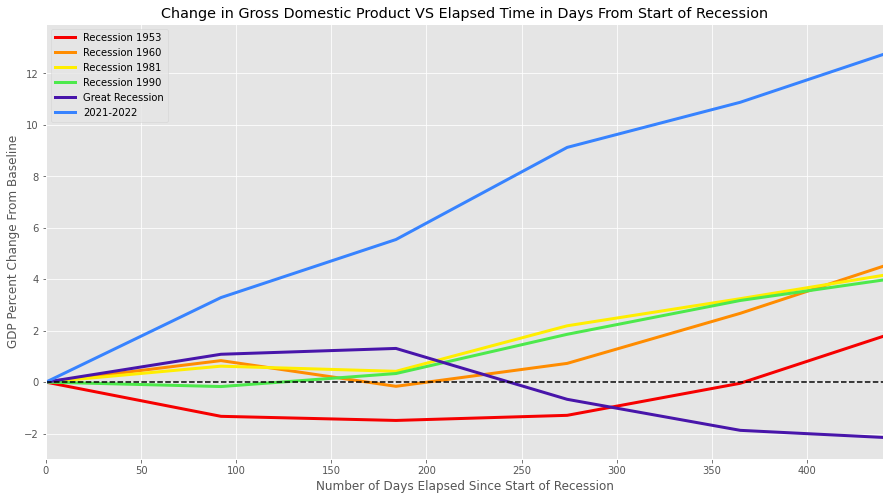

In [ ]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,8)

plt.plot(qRecession1953['Elapsed Time'], qRecession1953['Change from baseline'], label = "Recession 1953", color = "#F60000", linewidth = 3)
plt.plot(qRecession1960['Elapsed Time'], qRecession1960['Change from baseline'], label = "Recession 1960", color = "#FF8C00" , linewidth = 3)
plt.plot(qRecession1981['Elapsed Time'], qRecession1981['Change from baseline'], label = "Recession 1981", color = "#FFEE00", linewidth = 3)
plt.plot(qRecession1990['Elapsed Time'], qRecession1990['Change from baseline'], label = "Recession 1990", color = "#4DE94C", linewidth = 3)
plt.plot(qRecession2007['Elapsed Time'], qRecession2007['change from baseline'], label = "Great Recession", color = "#4815AA", linewidth = 3)
plt.plot(qRecession2022['Elapsed Time'], qRecession2022['Change from baseline'],label = "2021-2022", color = "#3783FF", linewidth = 3)

plt.title("Change in Gross Domestic Product VS Elapsed Time in Days From Start of Recession")
plt.xlabel("Number of Days Elapsed Since Start of Recession")
plt.ylabel("GDP Percent Change From Baseline")
plt.axhline(y = 0, color = "black", linestyle = "--")
plt.xlim(0)
plt.xlim(right = 440)
plt.legend(loc = "upper left")
plt.show()

Merging the two data frames

In [ ]:
mergedDf = pd.merge(qRecession1953,qRecession1960, how = 'outer')
print(mergedDf)

         DATE      GDP       Date  Elapsed Time  Elapsed       Recession  \
0    7/1/1953  391.171 1953-07-01             0   0 days  Recession 1953   
1   10/1/1953  385.970 1953-10-01            92  92 days  Recession 1953   
2    1/1/1954  385.345 1954-01-01           184 184 days  Recession 1953   
3    4/1/1954  386.121 1954-04-01           274 274 days  Recession 1953   
4    7/1/1954  390.996 1954-07-01           365 365 days  Recession 1953   
5   10/1/1954  399.734 1954-10-01           457 457 days  Recession 1953   
6    4/1/1960  541.080 1960-04-01             0      NaT  Recession 1960   
7    7/1/1960  545.604 1960-07-01            92      NaT  Recession 1960   
8   10/1/1960  540.197 1960-10-01           184      NaT  Recession 1960   
9    1/1/1961  545.018 1961-01-01           274      NaT  Recession 1960   
10   4/1/1961  555.545 1961-04-01           365      NaT  Recession 1960   
11   7/1/1961  567.664 1961-07-01           457      NaT  Recession 1960   

      start

Importing the dataset and demonstrating it can be loaded

# Analyzing Inflation

Pulling in Dataframe and subsetting for USA 

In [ ]:
inflationdf = pd.read_csv(r"/content/drive/MyDrive/Data Analysis/Inflation.csv", parse_dates = ['TIME'] )
inflationdf = inflationdf.iloc[19476 : 20275]
print(inflationdf)

      LOCATION INDICATOR SUBJECT MEASURE FREQUENCY       TIME     Value  \
19476      USA       CPI     TOT  AGRWTH         M 1956-03-01  0.374532   
19477      USA       CPI     TOT  AGRWTH         M 1956-04-01  0.749064   
19478      USA       CPI     TOT  AGRWTH         M 1956-05-01  1.123595   
19479      USA       CPI     TOT  AGRWTH         M 1956-06-01  1.872659   
19480      USA       CPI     TOT  AGRWTH         M 1956-07-01  2.238806   
...        ...       ...     ...     ...       ...        ...       ...   
20270      USA       CPI     TOT  AGRWTH         M 2022-05-01  8.581511   
20271      USA       CPI     TOT  AGRWTH         M 2022-06-01  9.059758   
20272      USA       CPI     TOT  AGRWTH         M 2022-07-01  8.524815   
20273      USA       CPI     TOT  AGRWTH         M 2022-08-01  8.262692   
20274      USA       CPI     TOT  AGRWTH         M 2022-09-01  8.201670   

      Flag Codes  
19476        NaN  
19477        NaN  
19478        NaN  
19479        NaN  
1948

Creating elapsed time interval

In [ ]:
inflationdf['Date'] = pd.to_datetime(inflationdf['TIME'], );
print(inflationdf)

      LOCATION INDICATOR SUBJECT MEASURE FREQUENCY       TIME     Value  \
19476      USA       CPI     TOT  AGRWTH         M 1956-03-01  0.374532   
19477      USA       CPI     TOT  AGRWTH         M 1956-04-01  0.749064   
19478      USA       CPI     TOT  AGRWTH         M 1956-05-01  1.123595   
19479      USA       CPI     TOT  AGRWTH         M 1956-06-01  1.872659   
19480      USA       CPI     TOT  AGRWTH         M 1956-07-01  2.238806   
...        ...       ...     ...     ...       ...        ...       ...   
20270      USA       CPI     TOT  AGRWTH         M 2022-05-01  8.581511   
20271      USA       CPI     TOT  AGRWTH         M 2022-06-01  9.059758   
20272      USA       CPI     TOT  AGRWTH         M 2022-07-01  8.524815   
20273      USA       CPI     TOT  AGRWTH         M 2022-08-01  8.262692   
20274      USA       CPI     TOT  AGRWTH         M 2022-09-01  8.201670   

      Flag Codes       Date  
19476        NaN 1956-03-01  
19477        NaN 1956-04-01  
19478    

Slicing off unneeded values from dataframe

In [ ]:
inflationdffixed = inflationdf[['TIME','Value']]
print(inflationdffixed.dtypes)
print(inflationdffixed.tail(24))

TIME     datetime64[ns]
Value           float64
dtype: object
            TIME     Value
20251 2020-10-01  1.182066
20252 2020-11-01  1.174536
20253 2020-12-01  1.362005
20254 2021-01-01  1.399770
20255 2021-02-01  1.676215
20256 2021-03-01  2.619762
20257 2021-04-01  4.159695
20258 2021-05-01  4.992707
20259 2021-06-01  5.391451
20260 2021-07-01  5.365475
20261 2021-08-01  5.251272
20262 2021-09-01  5.390349
20263 2021-10-01  6.221869
20264 2021-11-01  6.809003
20265 2021-12-01  7.036403
20266 2022-01-01  7.479873
20267 2022-02-01  7.871064
20268 2022-03-01  8.542456
20269 2022-04-01  8.258630
20270 2022-05-01  8.581511
20271 2022-06-01  9.059758
20272 2022-07-01  8.524815
20273 2022-08-01  8.262692
20274 2022-09-01  8.201670


Setting index as date and then subsetting for every four months 

In [ ]:
indexList = list(inflationdf['TIME'])
inflationdffixed.index = indexList
inflationdffixed.index = pd.to_datetime(inflationdffixed.index)
#inflationdffixed = inflationdffixed[inflationdffixed.index.month.isin([1,4,7,10])]
inflationdffixed.head(10)

,TIME,Value
1956-03-01,1956-03-01,0.374532
1956-04-01,1956-04-01,0.749064
1956-05-01,1956-05-01,1.123595
1956-06-01,1956-06-01,1.872659
1956-07-01,1956-07-01,2.238806
1956-08-01,1956-08-01,1.865672
1956-09-01,1956-09-01,1.858736
1956-10-01,1956-10-01,2.230483
1956-11-01,1956-11-01,2.230483
1956-12-01,1956-12-01,2.985075


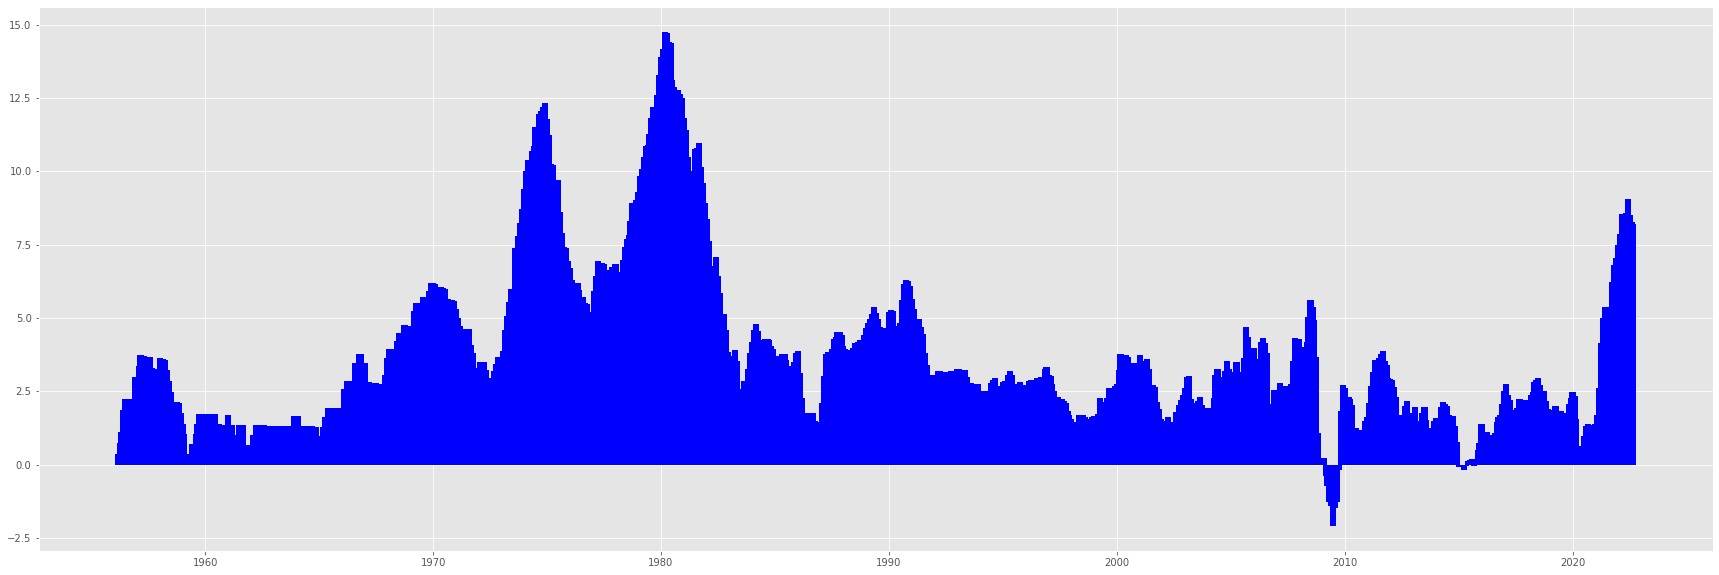

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
plt.bar(inflationdffixed.index, inflationdffixed['Value'], width = 100, color = "blue")

plt.show()


Trying to make a graph with alternate approach, highlighting previous recessions

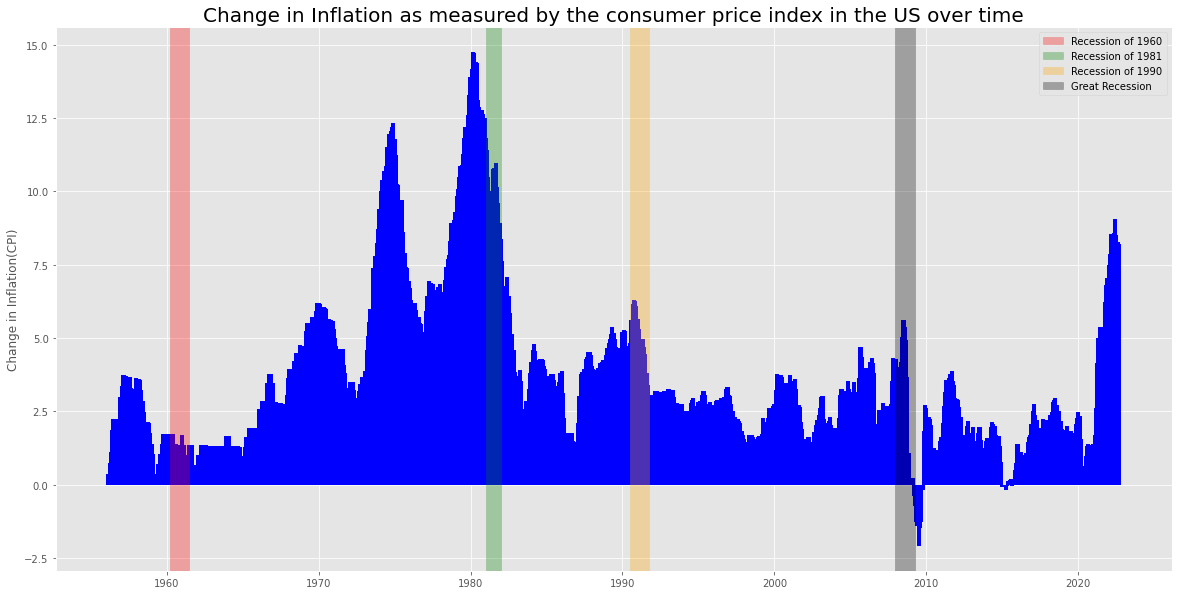

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(inflationdffixed.index,inflationdffixed['Value'], color = 'blue', width =100)
ax.axvspan(date2num(dt.datetime(1960,4,1)), date2num(dt.datetime(1961,7,1)), color = "red", alpha = 0.3, label = "Recession of 1960")
ax.axvspan(date2num(dt.datetime(1981,1,1)), date2num(dt.datetime(1982,1,1)), color = "green", alpha = 0.3, label = "Recession of 1981")
ax.axvspan(date2num(dt.datetime(1990,7,1)), date2num(dt.datetime(1991,10,1)), color = "orange", alpha = 0.3, label = "Recession of 1990")
ax.axvspan(date2num(dt.datetime(2007,12,1)), date2num(dt.datetime(2009,4,1)), color = "black", alpha = 0.3, label = "Great Recession")

ax.set_ylabel('Change in Inflation(CPI)')
ax.set_title('Change in Inflation as measured by the consumer price index in the US over time', size =20)
ax.legend()



Subsetting for recession of 1960 Adding a column for elapsed time

In [ ]:
inflation1960 = inflationdffixed['1960-04' : '1961-07']
averageInflation1960 = inflation1960['Value'].mean()
print(inflation1960)

                 TIME     Value
1960-04-01 1960-04-01  1.724138
1960-05-01 1960-05-01  1.724138
1960-06-01 1960-06-01  1.718213
1960-07-01 1960-07-01  1.369863
1960-08-01 1960-08-01  1.369863
1960-09-01 1960-09-01  1.023891
1960-10-01 1960-10-01  1.360544
1960-11-01 1960-11-01  1.360544
1960-12-01 1960-12-01  1.360544
1961-01-01 1961-01-01  1.706485
1961-02-01 1961-02-01  1.360544
1961-03-01 1961-03-01  1.360544
1961-04-01 1961-04-01  1.016949
1961-05-01 1961-05-01  1.016949
1961-06-01 1961-06-01  0.675676
1961-07-01 1961-07-01  1.351351


Subsetting for Recession of 1981

In [ ]:
inflation1981 = inflationdffixed["1981-07-01" : "1982-10-01"]
averageInflation1981 = inflation1981['Value'].mean()
print(inflation1981)

                 TIME      Value
1981-07-01 1981-07-01  10.761790
1981-08-01 1981-08-01  10.804320
1981-09-01 1981-09-01  10.952380
1981-10-01 1981-10-01  10.141510
1981-11-01 1981-11-01   9.590643
1981-12-01 1981-12-01   8.922364
1982-01-01 1982-01-01   8.390804
1982-02-01 1982-02-01   7.622298
1982-03-01 1982-03-01   6.779661
1982-04-01 1982-04-01   6.509540
1982-05-01 1982-05-01   6.681514
1982-06-01 1982-06-01   7.064018
1982-07-01 1982-07-01   6.441048
1982-08-01 1982-08-01   5.850488
1982-09-01 1982-09-01   5.042919
1982-10-01 1982-10-01   5.139186


Subsetting for Recession of 1990

In [ ]:
inflation1990 = inflationdffixed["1990-07-01" : "1991-10-01"]
averageInflation1990 = inflation1990['Value'].mean()
print(inflation1990)

                 TIME     Value
1990-07-01 1990-07-01  4.823151
1990-08-01 1990-08-01  5.617978
1990-09-01 1990-09-01  6.160000
1990-10-01 1990-10-01  6.289809
1990-11-01 1990-11-01  6.274821
1990-12-01 1990-12-01  6.106265
1991-01-01 1991-01-01  5.651491
1991-02-01 1991-02-01  5.312500
1991-03-01 1991-03-01  4.895105
1991-04-01 1991-04-01  4.887510
1991-05-01 1991-05-01  4.953560
1991-06-01 1991-06-01  4.695920
1991-07-01 1991-07-01  4.447853
1991-08-01 1991-08-01  3.799392
1991-09-01 1991-09-01  3.391108
1991-10-01 1991-10-01  2.921348


Subsetting for Great Recession

In [ ]:
inflation2007 = inflationdffixed["2008-01-01" : "2009-04-01"]
averageInflation2007 = inflation2007['Value'].mean()
print(inflation2007)

                 TIME     Value
2008-01-01 2008-01-01  4.280294
2008-02-01 2008-02-01  4.026556
2008-03-01 2008-03-01  3.981456
2008-04-01 2008-04-01  3.936890
2008-05-01 2008-05-01  4.175543
2008-06-01 2008-06-01  5.021790
2008-07-01 2008-07-01  5.600123
2008-08-01 2008-08-01  5.371855
2008-09-01 2008-09-01  4.936927
2008-10-01 2008-10-01  3.655186
2008-11-01 2008-11-01  1.069575
2008-12-01 2008-12-01  0.091413
2009-01-01 2009-01-01  0.029847
2009-02-01 2009-02-01  0.236191
2009-03-01 2009-03-01 -0.383556
2009-04-01 2009-04-01 -0.736886


Subsetting for current time

In [ ]:
inflationCurrent = inflationdffixed["2021-01-01" : "2022-04-01"]
averageInflationCurrent = inflationCurrent['Value'].mean()
print(inflationCurrent)

                 TIME     Value
2021-01-01 2021-01-01  1.399770
2021-02-01 2021-02-01  1.676215
2021-03-01 2021-03-01  2.619762
2021-04-01 2021-04-01  4.159695
2021-05-01 2021-05-01  4.992707
2021-06-01 2021-06-01  5.391451
2021-07-01 2021-07-01  5.365475
2021-08-01 2021-08-01  5.251272
2021-09-01 2021-09-01  5.390349
2021-10-01 2021-10-01  6.221869
2021-11-01 2021-11-01  6.809003
2021-12-01 2021-12-01  7.036403
2022-01-01 2022-01-01  7.479873
2022-02-01 2022-02-01  7.871064
2022-03-01 2022-03-01  8.542456
2022-04-01 2022-04-01  8.258630


Calculating Percent Change from baseline

In [ ]:
averageInflationList = [averageInflation1960, averageInflation1981, averageInflation1990, averageInflation2007, averageInflationCurrent]
print(averageInflationList)

[1.34376473125, 7.9184051875, 5.0142381875, 2.830825225, 5.529124625]


Creating an average inflation change from previous recessions

In [ ]:
rowNames = ["2021-2022", "Great Recession 2007" ,  'Recession 1990', 'Recession 1981', 'Recession 1960']
rowNames.reverse()
inflationdf2 = pd.DataFrame(averageInflationList)
inflationdf2.index = rowNames
inflationdf2.columns = ['Mean Inflation']
print(inflationdf2)

                      Mean Inflation
Recession 1960              1.343765
Recession 1981              7.918405
Recession 1990              5.014238
Great Recession 2007        2.830825
2021-2022                   5.529125


Creating Bar Graph of Inflation

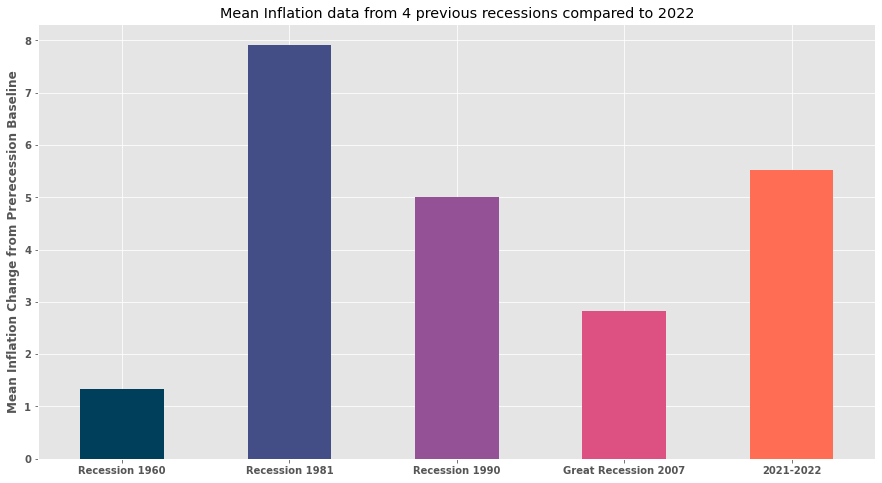

In [ ]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,8)
inflationdf2.plot.bar(use_index = True, y = "Mean Inflation", color = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"], legend = False, 
                  title = 'Mean Inflation data from 4 previous recessions compared to 2022' )
plt.xticks(rotation = 0, fontsize = 10, fontweight = 'bold')
plt.ylabel('Mean Inflation Change from Prerecession Baseline', fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

# Analyzing Changes in Interest Rate

In [ ]:
interestdf = pd.read_csv(r"/content/drive/MyDrive/Data Analysis/FEDFUNDS.csv", parse_dates = ['DATE'])
print(interestdf)

          DATE  FEDFUNDS
0   1954-07-01      0.80
1   1954-08-01      1.22
2   1954-09-01      1.07
3   1954-10-01      0.85
4   1954-11-01      0.83
..         ...       ...
815 2022-06-01      1.21
816 2022-07-01      1.68
817 2022-08-01      2.33
818 2022-09-01      2.56
819 2022-10-01      3.08

[820 rows x 2 columns]


Drop the last row to match the tail of the inflation data

In [ ]:
interestdf.drop(interestdf.tail(1).index, inplace = True)
print(interestdf.tail())

          DATE  FEDFUNDS
814 2022-05-01      0.77
815 2022-06-01      1.21
816 2022-07-01      1.68
817 2022-08-01      2.33
818 2022-09-01      2.56


Trimming the data set to make the date ranges match the inflation df

In [ ]:
interestdf = interestdf[20:]
print (interestdf.head())

         DATE  FEDFUNDS
20 1956-03-01      2.50
21 1956-04-01      2.62
22 1956-05-01      2.75
23 1956-06-01      2.71
24 1956-07-01      2.75


Setting the index to date object. Now inflation and interest rate are heterogenous 

In [ ]:
interestdf.index = indexList
print(interestdf)

                 DATE  FEDFUNDS
1956-03-01 1956-03-01      2.50
1956-04-01 1956-04-01      2.62
1956-05-01 1956-05-01      2.75
1956-06-01 1956-06-01      2.71
1956-07-01 1956-07-01      2.75
...               ...       ...
2022-05-01 2022-05-01      0.77
2022-06-01 2022-06-01      1.21
2022-07-01 2022-07-01      1.68
2022-08-01 2022-08-01      2.33
2022-09-01 2022-09-01      2.56

[799 rows x 2 columns]


Extracting FEDFUNS to add to inflation df

In [ ]:
FEDFUNDS = interestdf['FEDFUNDS']
print(FEDFUNDS)

1956-03-01    2.50
1956-04-01    2.62
1956-05-01    2.75
1956-06-01    2.71
1956-07-01    2.75
              ... 
2022-05-01    0.77
2022-06-01    1.21
2022-07-01    1.68
2022-08-01    2.33
2022-09-01    2.56
Name: FEDFUNDS, Length: 799, dtype: float64


Add this into inflation

In [ ]:
inflationdffixed = inflationdffixed.join(FEDFUNDS)
print(inflationdffixed.tail(21))

                 TIME     Value  FEDFUNDS
2021-01-01 2021-01-01  1.399770      0.09
2021-02-01 2021-02-01  1.676215      0.08
2021-03-01 2021-03-01  2.619762      0.07
2021-04-01 2021-04-01  4.159695      0.07
2021-05-01 2021-05-01  4.992707      0.06
2021-06-01 2021-06-01  5.391451      0.08
2021-07-01 2021-07-01  5.365475      0.10
2021-08-01 2021-08-01  5.251272      0.09
2021-09-01 2021-09-01  5.390349      0.08
2021-10-01 2021-10-01  6.221869      0.08
2021-11-01 2021-11-01  6.809003      0.08
2021-12-01 2021-12-01  7.036403      0.08
2022-01-01 2022-01-01  7.479873      0.08
2022-02-01 2022-02-01  7.871064      0.08
2022-03-01 2022-03-01  8.542456      0.20
2022-04-01 2022-04-01  8.258630      0.33
2022-05-01 2022-05-01  8.581511      0.77
2022-06-01 2022-06-01  9.059758      1.21
2022-07-01 2022-07-01  8.524815      1.68
2022-08-01 2022-08-01  8.262692      2.33
2022-09-01 2022-09-01  8.201670      2.56


Creating a graph showing inflation as bars and interest rates as lines

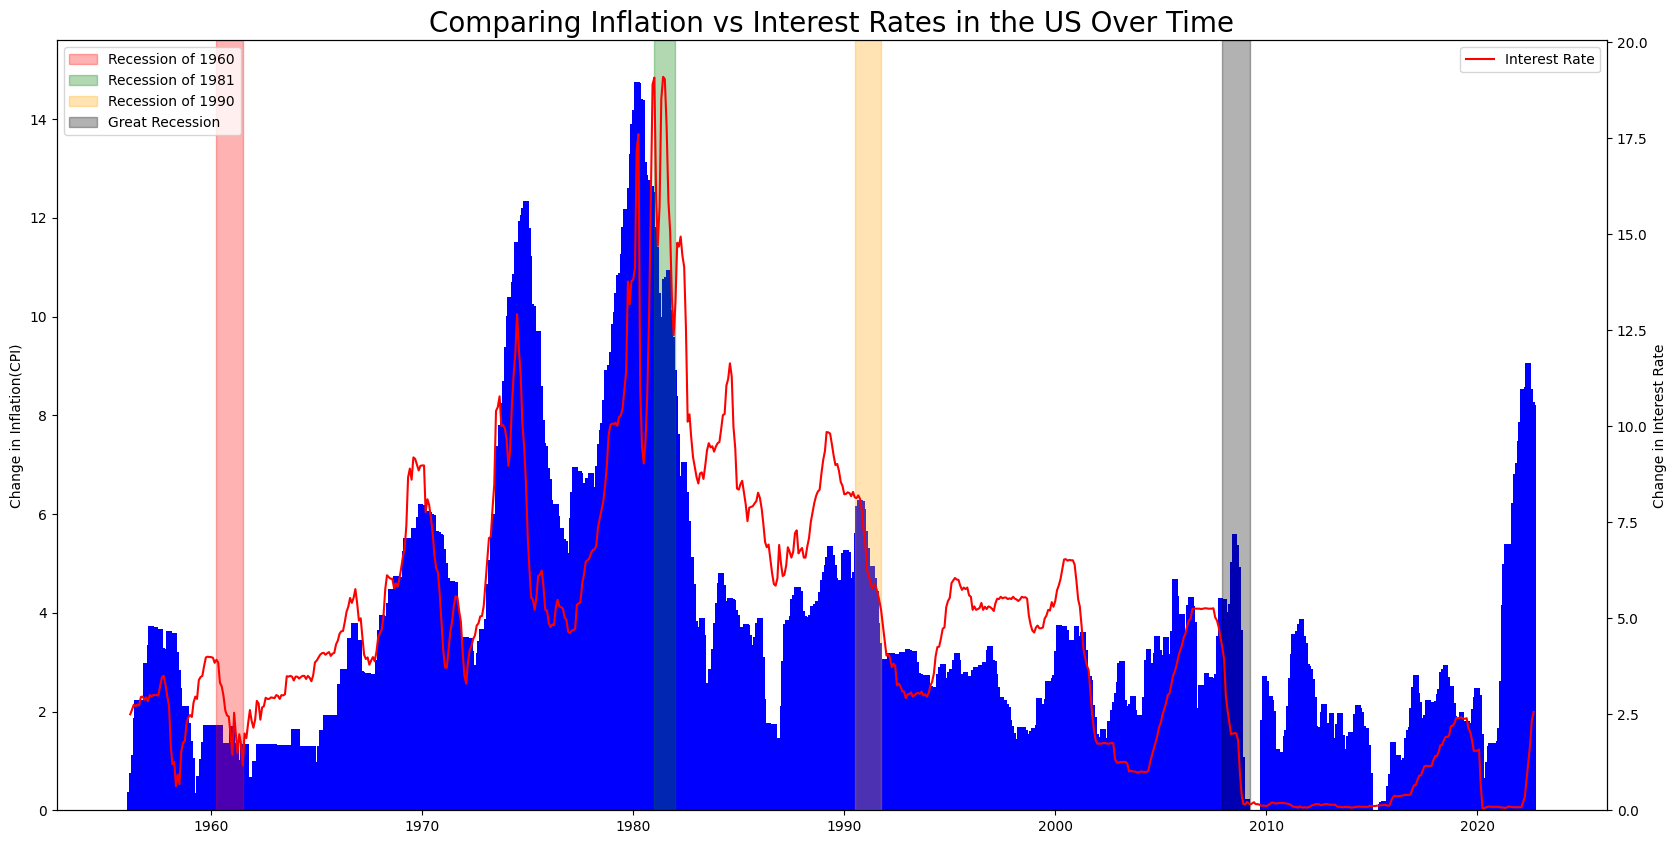

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(inflationdffixed.index,inflationdffixed['Value'], color = 'blue', width =100)
ax.axvspan(date2num(dt.datetime(1960,4,1)), date2num(dt.datetime(1961,7,1)), color = "red", alpha = 0.3, label = "Recession of 1960")
ax.axvspan(date2num(dt.datetime(1981,1,1)), date2num(dt.datetime(1982,1,1)), color = "green", alpha = 0.3, label = "Recession of 1981")
ax.axvspan(date2num(dt.datetime(1990,7,1)), date2num(dt.datetime(1991,10,1)), color = "orange", alpha = 0.3, label = "Recession of 1990")
ax.axvspan(date2num(dt.datetime(2007,12,1)), date2num(dt.datetime(2009,4,1)), color = "black", alpha = 0.3, label = "Great Recession")
ax2 = ax.twinx()

ax2.plot(inflationdffixed['FEDFUNDS'], label = 'Interest Rate', color = "red")
ax.set_ylim(bottom = 0)
ax2.set_ylim(bottom = 0)
ax2.set_ylabel("Change in Interest Rate")
ax.set_ylabel('Change in Inflation(CPI)')
ax.set_title('Comparing Inflation vs Interest Rates in the US Over Time', size =20)
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

Finding correrlation between inflation and interest rates

In [ ]:
correlation = inflationdffixed['Value'].corr(inflationdffixed['FEDFUNDS'])
print(correlation)

0.7075940412239726


Plotting correrlation

Text(15, -1, 'r = 0.708')

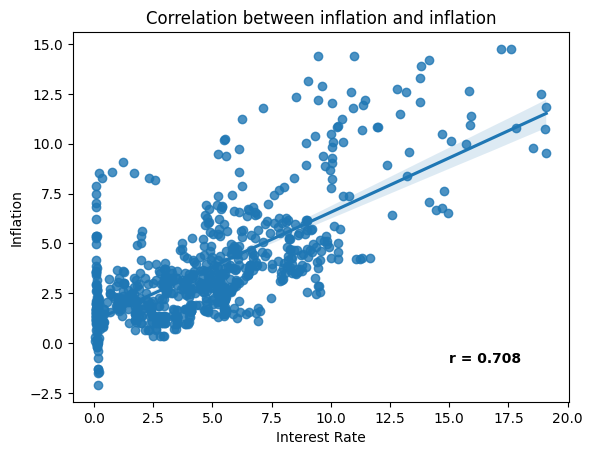

In [ ]:
correlationplot = sns.regplot(x = inflationdffixed['FEDFUNDS'], y = inflationdffixed['Value']).set(title = "Correlation between inflation and inflation", xlabel = "Interest Rate", ylabel = "Inflation")
plt.text(15, -1,"r = 0.708", weight = 'bold')
